In [1]:
import pandas as pd
import numpy as np
 
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## Download the data

In [2]:
data='https://raw.githubusercontent.com/gastonstat/CreditScoring/refs/heads/master/CreditScoring.csv'
!wget -O CreditScoring.csv $data
df = pd.read_csv('CreditScoring.csv')
df.head()

--2025-11-25 12:39:00--  https://raw.githubusercontent.com/gastonstat/CreditScoring/refs/heads/master/CreditScoring.csv


Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘CreditScoring.csv’

CreditScoring.csv   100%[===================>] 178.21K  --.-KB/s    in 0.1s    

2025-11-25 12:39:01 (1.22 MB/s) - ‘CreditScoring.csv’ saved [182489/182489]



,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


# Some data manipulations

In [3]:
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [4]:
df.status.value_counts()

status
1    3200
2    1254
0       1
Name: count, dtype: int64

In [5]:
statues_values={
    1: 'ok',
    2: 'bad',
    0: 'unknow'
}

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

marital_values = {
    1: 'single', 
    2: 'married', 
    3: 'widow', 
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

job_values = {
    1: 'fixed', 
    2: 'partime', 
    3: 'freelance', 
    4: 'others',
    0: 'unk'
}

df['status'] = df['status'].map(statues_values)
df['home'] = df['home'].map(home_values)
df['marital'] = df['marital'].map(marital_values)
df['records'] = df['records'].map(records_values)
df['job'] = df['job'].map(job_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,bad,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [6]:
df.describe().round(2)

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.00,4455.00,4455.00,4455.00,4455.00,4455.00,4455.00,4455.00,4455.00
mean,7.99,46.44,37.08,55.57,763316.99,1060340.81,404381.96,1039.02,1462.88
std,8.17,14.66,10.98,19.52,8703625.26,10217568.67,6344253.40,474.54,628.09
min,0.00,6.00,18.00,35.00,0.00,0.00,0.00,100.00,105.00
25%,2.00,36.00,28.00,35.00,80.00,0.00,0.00,700.00,1117.50
50%,5.00,48.00,36.00,51.00,120.00,3500.00,0.00,1000.00,1400.00
75%,12.00,60.00,45.00,72.00,166.00,6000.00,0.00,1300.00,1692.00
max,48.00,72.00,68.00,180.00,99999999.00,99999999.00,99999999.00,5000.00,11140.00


In [7]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(99999999, np.nan)
df.describe().round(2)

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.00,4455.00,4455.00,4455.00,4421.00,4408.00,4437.00,4455.00,4455.00
mean,7.99,46.44,37.08,55.57,130.57,5403.43,342.95,1039.02,1462.88
std,8.17,14.66,10.98,19.52,86.37,11573.16,1245.86,474.54,628.09
min,0.00,6.00,18.00,35.00,0.00,0.00,0.00,100.00,105.00
25%,2.00,36.00,28.00,35.00,80.00,0.00,0.00,700.00,1117.50
50%,5.00,48.00,36.00,51.00,120.00,3000.00,0.00,1000.00,1400.00
75%,12.00,60.00,45.00,72.00,165.00,6000.00,0.00,1300.00,1692.00
max,48.00,72.00,68.00,180.00,959.00,300000.00,30000.00,5000.00,11140.00


In [8]:
df = df[df.status != 'unknow'].reset_index(drop=True)
df.status.value_counts()

status
ok     3200
bad    1254
Name: count, dtype: int64

# Eliminate unbalance on the target value

In [9]:
# Separate majority and minority classes
df_ok = df[df['status'] == 'ok']
df_bad = df[df['status'] == 'bad']

df_ok_downsampled = df_ok.sample(n=1254, random_state=42)
df_balanced = pd.concat([df_ok_downsampled, df_bad]).sample(frac=1, random_state=42).reset_index(drop=True)

df_balanced.status.value_counts()
df_balanced.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,bad,0,rent,60,36,married,no,others,47,121.0,0.0,0.0,900,1423
1,ok,15,owner,60,50,widow,no,fixed,45,156.0,9800.0,0.0,700,1136
2,bad,3,owner,48,21,single,no,fixed,35,466.0,6000.0,0.0,2700,3100
3,bad,0,other,60,25,married,no,partime,60,60.0,0.0,0.0,1300,1380
4,bad,4,parents,48,25,single,no,fixed,35,73.0,0.0,0.0,700,814


# Split the data set

In [10]:
from sklearn.model_selection import train_test_split

df_fulltrain, df_test = train_test_split(df_balanced, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_fulltrain, test_size=0.25, random_state=11)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True) 
df_test = df_test.reset_index(drop=True)


Check the status of the loan.

In [11]:
df_train.status.value_counts()

status
ok     771
bad    733
Name: count, dtype: int64

The status with bad means the loan what not accepted.

The status with ok is accepted.

The code tranforme the bad values to 1 and ok to 0

In [12]:
(df_train.status=='bad').astype(int) 

0       0
1       1
2       1
3       0
4       0
       ..
1499    1
1500    0
1501    0
1502    0
1503    0
Name: status, Length: 1504, dtype: int64

In [13]:
y_train = (df_train.status=='bad').astype(int)
y_val = (df_val.status=='bad').astype(int)
y_test = (df_test.status=='bad').astype(int)

del df_train['status']
del df_val['status']
del df_test['status']

In [14]:
df_train.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,3,private,36,20,married,no,fixed,45,50.0,1500.0,100.0,1000,1387
1,2,rent,60,32,married,yes,freelance,60,NaN,0.0,0.0,1100,1480
2,1,parents,36,22,single,no,fixed,35,80.0,8000.0,0.0,490,690
3,15,owner,60,43,married,no,freelance,60,310.0,7000.0,0.0,1200,1297
4,3,owner,48,26,single,no,fixed,35,157.0,7000.0,0.0,1200,2053


In [15]:
numerical=['seniority', 'time', 'age', 'expenses', 'income', 'assets', 'debt', 'amount', 'price']
categorical=['home', 'marital', 'records', 'job'] 


In [16]:
df_train.isna().sum()
for n in numerical:
    df_train[n].fillna(0, inplace=True)
df_train.isna().sum()

/tmp/ipykernel_2812/1903115827.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[n].fillna(0, inplace=True)


seniority    0
home         0
time         0
age          0
marital      0
records      0
job          0
expenses     0
income       0
assets       0
debt         0
amount       0
price        0
dtype: int64

# Vectorisation

In [17]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

# Training

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
y_train_pred = model.predict_proba(X_train)[:, 1]
roc= roc_auc_score(y_train, y_train_pred)
print("Training roc_auc:", roc)

Training roc_auc: 0.7837255349531004


In [19]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_val_pred = model.predict_proba(X_val)[:, 1]
roc= roc_auc_score(y_val, y_val_pred)
print("Validation roc_auc:", roc)

Validation roc_auc: 0.7676155332981902


Explore the tree root deeph

In [20]:
from sklearn.tree import export_text
r = export_text(model, feature_names=dv.get_feature_names_out().tolist())
print(r)

|--- seniority <= 3.50
|   |--- records=yes <= 0.50
|   |   |--- job=fixed <= 0.50
|   |   |   |--- class: 1
|   |   |--- job=fixed >  0.50
|   |   |   |--- class: 0
|   |--- records=yes >  0.50
|   |   |--- assets <= 8500.00
|   |   |   |--- class: 1
|   |   |--- assets >  8500.00
|   |   |   |--- class: 1
|--- seniority >  3.50
|   |--- income <= 89.50
|   |   |--- assets <= 3800.00
|   |   |   |--- class: 1
|   |   |--- assets >  3800.00
|   |   |   |--- class: 0
|   |--- income >  89.50
|   |   |--- records=no <= 0.50
|   |   |   |--- class: 1
|   |   |--- records=no >  0.50
|   |   |   |--- class: 0



## Decision trees parameter tuning

In [21]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [4, 5, 6, 7, 10, 15, 20, None],
    'min_samples_leaf': [1, 2, 5, 10, 15, 20, 100, 200, 500]
}

# Create the model
dt = DecisionTreeClassifier(random_state=1)

# Use GridSearchCV with AUC as the scoring metric
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring='roc_auc',  # Uses AUC for evaluation
    cv=5,  # 5-fold cross-validation (optional, adjust as needed)
    verbose=1
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Get results
print("Best parameters:", grid_search.best_params_)
print("Best AUC score:", grid_search.best_score_)

# Convert results to DataFrame (similar to your df_scores)
results_df = pd.DataFrame(grid_search.cv_results_)
results_df = results_df[['param_max_depth', 'param_min_samples_leaf', 'mean_test_score']]
results_df.columns = ['max_depth', 'min_samples_leaf', 'auc']
results_df.sort_values(by='auc', ascending=False).head()

Fitting 5 folds for each of 72 candidates, totalling 360 fits


Best parameters: {'max_depth': 6, 'min_samples_leaf': 20}
Best AUC score: 0.7941193308331476


,max_depth,min_samples_leaf,auc
23,6,20,0.794119
32,7,20,0.791606
41,10,20,0.790056
50,15,20,0.790056
68,None,20,0.790056


Final decisiontree model

In [22]:
dt= DecisionTreeClassifier(max_depth=6, min_samples_leaf=20, criterion='gini')
dt.fit(X_train, y_train)
y_train_pred = dt.predict_proba(X_train)[:, 1]
roc= roc_auc_score(y_train, y_train_pred)
print("Training roc_auc:", roc)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_val_pred = dt.predict_proba(X_val)[:, 1]
roc= roc_auc_score(y_val, y_val_pred)
print("Validation roc_auc:", roc)

test_dicts = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(test_dicts)
y_test_pred = dt.predict_proba(X_test)[:, 1]
roc= roc_auc_score(y_test, y_test_pred)
print("Test roc_auc:", roc)

Training roc_auc: 0.8660993766179533
Validation roc_auc: 0.7749237232632067
Test roc_auc: 0.8043412698412697


## RandomForest

Mixing multiple decision tree trained with alternative features and deliver independente result.

The differentes result of the tree are agregaged.


In [23]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Define the parameter grid
param_grid = {
    'max_depth': [5, 10, 15],
    'n_estimators': range(10, 201, 10),
    'min_samples_leaf': [1, 3, 5, 10, 50]
}

# Create the model
rf = RandomForestClassifier(random_state=1)

# GridSearchCV with AUC scoring
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,  # or use a single train/val split
    n_jobs=-1,  # parallel processing
    verbose=2
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best AUC:", grid_search.best_score_)

# Convert results to DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)
df_scores = results_df[['param_max_depth', 'param_n_estimators', 
                         'param_min_samples_leaf', 'mean_test_score']]
df_scores.columns = ['max_depth', 'n_estimators', 'min_samples_leaf', 'auc']
df_scores = df_scores.sort_values('auc', ascending=False)

# View top results
print(df_scores.head(10))

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV] END ...max_depth=5, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END ...max_depth=5, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END ...max_depth=5, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END ...max_depth=5, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END ...max_depth=5, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END ...max_depth=5, min_samples_leaf=1, n_estimators=20; total time=   0.1s
[CV] END ...max_depth=5, min_samples_leaf=1, n_estimators=20; total time=   0.1s
[CV] END ...max_depth=5, min_samples_leaf=1, n_estimators=20; total time=   0.1s
[CV] END ...max_depth=5, min_samples_leaf=1, n_estimators=20; total time=   0.1s
[CV] END ...max_depth=5, min_samples_leaf=1, n_estimators=20; total time=   0.1s
[CV] END ...max_depth=5, min_samples_leaf=1, n_estimators=30; total time=   0.1s
[CV] END ...max_depth=5, min_samples_leaf=1, 

In [24]:
rf = RandomForestClassifier(max_depth=10, n_estimators=190, min_samples_leaf=5)
rf.fit(X_train, y_train)
y_train_pred = rf.predict_proba(X_train)[:, 1]
roc= roc_auc_score(y_train, y_train_pred)
print("Training roc_auc:", roc)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_val_pred = rf.predict_proba(X_val)[:, 1]
roc= roc_auc_score(y_val, y_val_pred)
print("Validation roc_auc:", roc)

test_dicts = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(test_dicts)
y_test_pred = rf.predict_proba(X_test)[:, 1]
roc= roc_auc_score(y_test, y_test_pred)
print("Test roc_auc:", roc)

Training roc_auc: 0.943813335739804
Validation roc_auc: 0.8269356719541222
Test roc_auc: 0.8526984126984127


## Trees Boosting XGBoost

In [ ]:
#!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 MB 21.4 MB/s  0:00:05m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.8/296.8 MB 21.4 MB/s  0:00:13m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [xgboost]m1/2 [xgboost]


In [26]:
import xgboost as xgb

In [27]:
features = dv.get_feature_names_out().tolist()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [39]:

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 10,

    'objective': 'binary:logistic',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    'eval_metric': 'auc'
}

model = xgb.train(
    xgb_params,
    dtrain,
    num_boost_round=200,
    evals=[(dtrain, 'train'), (dval, 'val')],
    early_stopping_rounds=50,
    verbose_eval=5
)

[0]	train-auc:0.78192	val-auc:0.76451
[5]	train-auc:0.82430	val-auc:0.79375
[10]	train-auc:0.84497	val-auc:0.80414
[15]	train-auc:0.85903	val-auc:0.81471
[20]	train-auc:0.86732	val-auc:0.82256
[25]	train-auc:0.87535	val-auc:0.82626
[30]	train-auc:0.88178	val-auc:0.83075
[35]	train-auc:0.88444	val-auc:0.83340
[40]	train-auc:0.88820	val-auc:0.83450
[45]	train-auc:0.89149	val-auc:0.83730
[50]	train-auc:0.89472	val-auc:0.83916
[55]	train-auc:0.89737	val-auc:0.83955
[60]	train-auc:0.89922	val-auc:0.83968
[65]	train-auc:0.90144	val-auc:0.84011
[70]	train-auc:0.90353	val-auc:0.84055
[75]	train-auc:0.90537	val-auc:0.84108
[80]	train-auc:0.90680	val-auc:0.83962
[85]	train-auc:0.90758	val-auc:0.83979
[90]	train-auc:0.90930	val-auc:0.83847
[95]	train-auc:0.91089	val-auc:0.83711
[100]	train-auc:0.91245	val-auc:0.83737
[105]	train-auc:0.91393	val-auc:0.83700
[110]	train-auc:0.91484	val-auc:0.83706
[115]	train-auc:0.91655	val-auc:0.83687
[120]	train-auc:0.91730	val-auc:0.83647
[122]	train-auc:0.9177

[0]	train-auc:0.78192	val-auc:0.76451
[5]	train-auc:0.82430	val-auc:0.79375
[10]	train-auc:0.84497	val-auc:0.80414
[15]	train-auc:0.85903	val-auc:0.81471
[20]	train-auc:0.86732	val-auc:0.82256
[25]	train-auc:0.87535	val-auc:0.82626
[30]	train-auc:0.88178	val-auc:0.83075
[35]	train-auc:0.88444	val-auc:0.83340
[40]	train-auc:0.88820	val-auc:0.83450
[45]	train-auc:0.89149	val-auc:0.83730
[50]	train-auc:0.89472	val-auc:0.83916
[55]	train-auc:0.89737	val-auc:0.83955
[60]	train-auc:0.89922	val-auc:0.83968
[65]	train-auc:0.90144	val-auc:0.84011
[70]	train-auc:0.90353	val-auc:0.84055
[75]	train-auc:0.90537	val-auc:0.84108
[80]	train-auc:0.90680	val-auc:0.83962
[85]	train-auc:0.90758	val-auc:0.83979
[90]	train-auc:0.90930	val-auc:0.83847
[95]	train-auc:0.91089	val-auc:0.83711
[100]	train-auc:0.91245	val-auc:0.83737
[105]	train-auc:0.91393	val-auc:0.83700
[110]	train-auc:0.91484	val-auc:0.83706
[115]	train-auc:0.91655	val-auc:0.83687
[120]	train-auc:0.91730	val-auc:0.83647
[125]	train-auc:0.9187

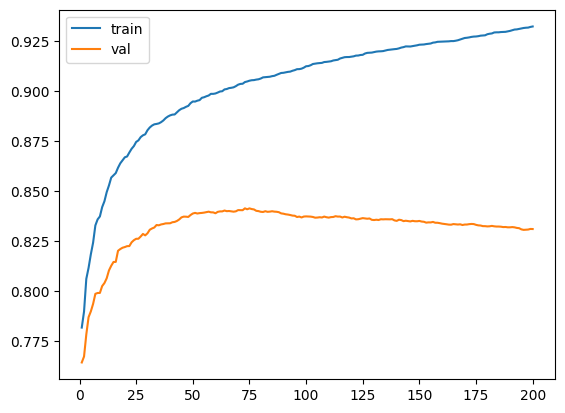

In [41]:
import matplotlib.pyplot as plt

evals_result = {}

model = xgb.train(params=xgb_params,
                  dtrain=dtrain,
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=[(dtrain, 'train'), (dval, 'val')],
                  evals_result=evals_result)

columns = ['iter', 'train_auc', 'val_auc']
train_aucs = list(evals_result['train'].values())[0]
val_aucs = list(evals_result['val'].values())[0]

df_scores = pd.DataFrame(
    list(zip(
        range(1, len(train_aucs) + 1),
        train_aucs,
        val_aucs
    )), columns=columns)

plt.plot(df_scores.iter, df_scores.train_auc, label='train')
plt.plot(df_scores.iter, df_scores.val_auc, label='val')
plt.legend()